In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
import joblib
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [9]:
file_list = []
for root_dir,sub_dir,files in os.walk('./data'):
    file_list.append(files)
file_list = file_list[0]
dataframe_list = pd.DataFrame()
for file in files:
    if file.endswith('xlsx'):
        file_name = os.path.join(root_dir,file)
        df = pd.read_excel(file_name)
        dataframe_list = dataframe_list.append(df)

In [10]:
dataframe_list.shape

(466200, 18)

In [11]:
dataframe_list.drop('新建角色数',axis=1,inplace=True)
dataframe_list.columns = ['channel_id','source_id','data_win','model_run_datetime','create_time',
                         'game_id','platform','source_run_date_amount','create_role_num','create_role_cost','create_role_pay_num',
                          'create_role_pay_cost','create_role_pay_sum','create_role_roi','create_role_retain_1d','create_role_pay_rate',
                         'create_role_30_pay_sum']
dataframe_list.dropna(how='any',inplace=True)

In [12]:
dataframe_list.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum
0,20451,304184,0,2020-05-01,2020-04-30,1000840,1,29.31,3,9.770000,0,0.00,0,0.000000,0.6667,0.00000,12
1,20451,304185,0,2020-05-01,2020-04-30,1000840,1,496.71,12,41.392500,0,0.00,0,0.000000,0.0000,0.00000,0
2,20451,304186,0,2020-05-01,2020-04-30,1000840,1,14863.08,87,170.840000,1,14863.08,12,0.000807,0.1149,0.01149,954
3,20545,291448,0,2020-05-01,2020-04-09,1000840,1,1644.47,123,13.369675,0,0.00,0,0.000000,0.0976,0.00000,198
4,20545,296967,0,2020-05-01,2020-04-20,1000840,1,1886.79,39,48.379231,0,0.00,0,0.000000,0.1795,0.00000,12


In [14]:
dataframe_list = dataframe_list[dataframe_list['data_win'].isin([0,1,2,3,7])]

In [15]:
dataframe_list = dataframe_list[dataframe_list['source_run_date_amount'] > 0]
dataframe_list.sort_values(by='data_win',inplace=True)
dataframe_list.drop_duplicates(subset=['channel_id','source_id','source_run_date_amount','create_role_num'],keep='first'
                               ,inplace=True)

In [16]:
dataframe_list.shape

(92277, 17)

In [17]:
dataframe_list['data_win'].value_counts()

0    25707
1    20603
7    18061
2    15544
3    12362
Name: data_win, dtype: int64

In [18]:
dataframe_list['30_roi'] = dataframe_list['create_role_30_pay_sum']/dataframe_list['source_run_date_amount']

## 分析win=0

In [19]:
data_win0 = dataframe_list[dataframe_list['data_win']==0]

In [20]:
data_win0['game_id'].value_counts()

1000840    12691
1000993     8159
1001049     2688
1000960     1142
1001258     1009
1000954       18
Name: game_id, dtype: int64

In [24]:
data_win0[data_win0['game_id']==1000840].head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum,30_roi
0,20451,304184,0,2020-05-01,2020-04-30,1000840,1,29.31,3,9.77,0,0.0,0,0.0,0.6667,0.0,12,0.409417
11274,21116,320025,0,2020-06-27,2020-06-17,1000840,1,0.11,0,0.11,0,0.0,0,0.0,0.0000,0.0,0,0.000000
11276,20953,320910,0,2020-06-27,2020-06-20,1000840,1,362.06,0,362.06,0,0.0,0,0.0,0.0000,0.0,0,0.000000
11277,21116,321278,0,2020-06-27,2020-06-22,1000840,1,0.17,0,0.17,0,0.0,0,0.0,0.0000,0.0,0,0.000000
11278,21116,321279,0,2020-06-27,2020-06-22,1000840,1,0.48,0,0.48,0,0.0,0,0.0,0.0000,0.0,0,0.000000


In [37]:
# 删除game_id=1000954
data_win0.drop(data_win0[data_win0['game_id']==1000954].index,inplace=True)

In [39]:
import matplotlib.pyplot as plt

In [56]:
data_win0[data_win0['platform']==1]['create_role_cost'].describe()

count    16449.000000
mean        78.727311
std        388.306009
min          0.000167
25%         15.866032
50%         35.972000
75%         82.730000
max      44000.000000
Name: create_role_cost, dtype: float64

In [57]:
data_win0[data_win0['platform']==2]['create_role_cost'].describe()

count     9134.000000
mean       125.983440
std        260.122757
min          0.000238
25%         27.900956
50%         71.565000
75%        156.945000
max      18607.800000
Name: create_role_cost, dtype: float64

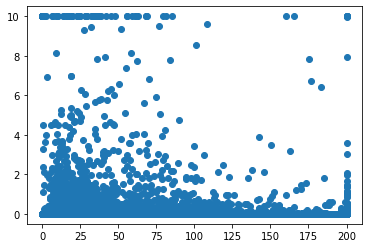

In [44]:
x = np.clip(data_win0[data_win0['game_id']==1000840]['create_role_cost'],0,200)
y = np.clip(data_win0[data_win0['game_id']==1000840]['30_roi'],0,10)
plt.scatter(x,y)
plt.show()

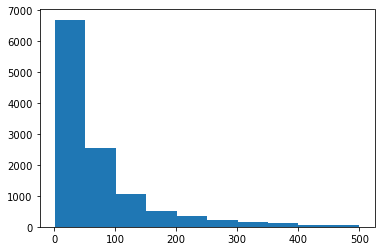

In [48]:
plt.hist(data_win0[data_win0['game_id']==1000840]['create_role_cost'],range=(1,500))
plt.show()

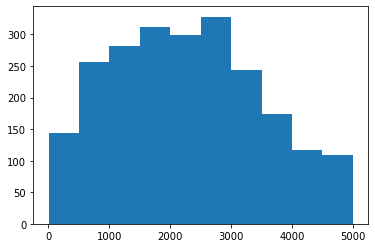

In [82]:
plt.hist(data_win0[data_win0['platform']==1]['create_role_pay_cost'],range=(1,5000))
plt.show()

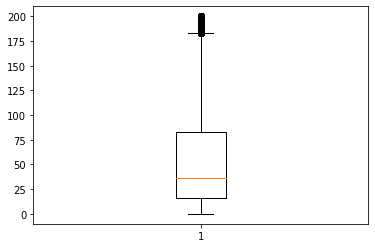

In [58]:
plt.boxplot(np.clip(data_win0[data_win0['platform']==1]['create_role_cost'],0,200))
plt.show()

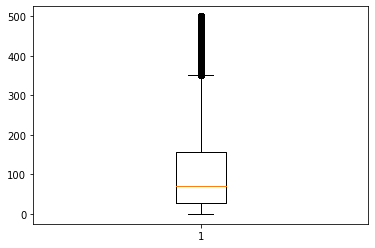

In [61]:
plt.boxplot(np.clip(data_win0[data_win0['platform']==2]['create_role_cost'],0,500))
plt.show()

In [84]:
np.clip(data_win0[data_win0['platform']==1]['create_role_pay_cost'],100,5000).describe()

count    16449.000000
mean       458.894031
std       1009.080495
min        100.000000
25%        100.000000
50%        100.000000
75%        100.000000
max       5000.000000
Name: create_role_pay_cost, dtype: float64

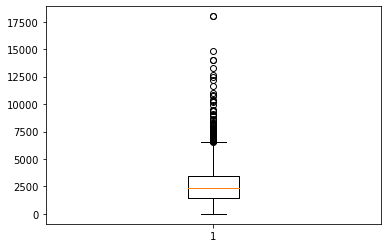

In [86]:
plt.boxplot(np.clip(data_win0[(data_win0['platform']==1)&(data_win0['create_role_pay_cost']!=0)]['create_role_pay_cost'],0,18000))
plt.show()

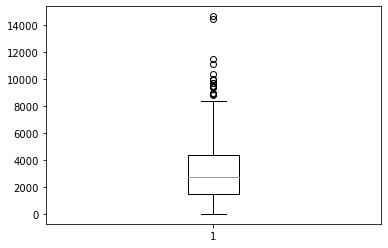

In [87]:
plt.boxplot(np.clip(data_win0[(data_win0['platform']==2)&(data_win0['create_role_pay_cost']!=0)]['create_role_pay_cost'],0,18000))
plt.show()

In [67]:
# 统计每个游戏包的平均加权创角成本
create_role_cost_standard_list = []
for game_id in data_win0['game_id'].value_counts().index:
    value = round(data_win0[data_win0['game_id']==game_id]['source_run_date_amount'].sum() / 
                                 data_win0[data_win0['game_id']==game_id]['create_role_num'].sum(),2)
    print(game_id,'平均创角成本',value)    
    create_role_cost_standard_list.append(value)

1000840 平均创角成本 25.17
1000993 平均创角成本 59.23
1001049 平均创角成本 16.03
1000960 平均创角成本 22.84
1001258 平均创角成本 49.77


In [71]:
# 统计每个游戏包的平均加权付费成本
create_role_pay_cost_standard_list = []
for game_id in data_win0['game_id'].value_counts().index:
    value = round(data_win0[data_win0['game_id']==game_id]['source_run_date_amount'].sum() / 
                                 data_win0[data_win0['game_id']==game_id]['create_role_pay_num'].sum(),2)
    print(game_id,'平均付费成本',value)
    create_role_pay_cost_standard_list.append(value)

1000840 平均付费成本 5207.73
1000993 平均付费成本 8641.35
1001049 平均付费成本 4820.2
1000960 平均付费成本 6469.16
1001258 平均付费成本 18997.71


In [72]:
standard = pd.DataFrame()

In [73]:
standard['game_id'] = data_win0['game_id'].value_counts().index.tolist()
standard['create_role_cost_mean'] = create_role_cost_standard_list
standard['create_role_pay_cost_mean'] = create_role_pay_cost_standard_list

In [74]:
standard.head()

,game_id,create_role_cost_mean,create_role_pay_cost_mean
0,1000840,25.17,5207.73
1,1000993,59.23,8641.35
2,1001049,16.03,4820.20
3,1000960,22.84,6469.16
4,1001258,49.77,18997.71


In [ ]:
# 以上分析发现，各游戏包的的成本差异较大，询问投放人员，在实际业务中按统一标准进行操作

In [91]:
print('安卓加权平均创角成本',round(data_win0[data_win0['platform']==1]['source_run_date_amount'].sum() / 
                                 data_win0[data_win0['platform']==1]['create_role_num'].sum(),2))
print('IOS加权平均创角成本',round(data_win0[data_win0['platform']==2]['source_run_date_amount'].sum() / 
                                 data_win0[data_win0['platform']==2]['create_role_num'].sum(),2))
print('安卓加权平均付费成本',round(data_win0[data_win0['platform']==1]['source_run_date_amount'].sum() / 
                                 data_win0[data_win0['platform']==1]['create_role_pay_num'].sum(),2))
print('IOS加权平均付费成本',round(data_win0[data_win0['platform']==2]['source_run_date_amount'].sum() / 
                                 data_win0[data_win0['platform']==2]['create_role_pay_num'].sum(),2))

安卓加权平均创角成本 22.89
IOS加权平均创角成本 58.66
安卓加权平均付费成本 5207.07
IOS加权平均付费成本 8888.4


In [92]:
# 统计每个平台的创角成本分布标准差
print(np.std(np.clip(data_win0[(data_win0['platform']==1)&(data_win0['create_role_cost']!=0)]['create_role_cost'],0,180)))
print(np.std(np.clip(data_win0[(data_win0['platform']==2)&(data_win0['create_role_cost']!=0)]['create_role_cost'],0,350)))

55.84427620610296
104.48716813373609


In [93]:
# 统计每个平台的付费成本分布标准差
print(np.std(np.clip(data_win0[(data_win0['platform']==2)&(data_win0['create_role_pay_cost']!=0)]['create_role_pay_cost'],0.1,6500)))
print(np.std(np.clip(data_win0[(data_win0['platform']==2)&(data_win0['create_role_pay_cost']!=0)]['create_role_pay_cost'],0.1,8000)))

1842.5668279034815
2008.401948181607


### 将无付费创角成本大于mean+std的标记为1，实时关停；

In [23]:
data_ignore = dataframe_list[dataframe_list['source_run_date_amount'] < 500]
data_not_ignore = dataframe_list[dataframe_list['source_run_date_amount'] >= 500]
data_an = data_not_ignore[data_not_ignore['platform'] == 1]
data_ios = data_not_ignore[data_not_ignore['platform'] == 2]
data_win_0 = data_an[data_an['data_win'] == 0]
data_win_1 = data_an[data_an['data_win'] == 1]
data_win_2 = data_an[data_an['data_win'] == 2]
data_win_3 = data_an[data_an['data_win'] == 3]
data_win_7 = data_an[data_an['data_win'] == 7]
data_win_0_ios = data_ios[data_ios['data_win'] == 0]
data_win_1_ios = data_ios[data_ios['data_win'] == 1]
data_win_2_ios = data_ios[data_ios['data_win'] == 2]
data_win_3_ios = data_ios[data_ios['data_win'] == 3]
data_win_7_ios = data_ios[data_ios['data_win'] == 7]

## 计划状态1

In [1120]:
data_win_0.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum,30_roi,label
11258,6867,318975,0,2020-06-27,2020-06-12,1001049,1,1542.94,28,55.105000,0,0.00000,0,0.000000,0.0357,0.00000,12,0.007777,2
11262,20754,318396,0,2020-06-27,2020-06-11,1001049,1,2124.25,34,62.477941,0,0.00000,0,0.000000,0.0588,0.00000,0,0.000000,2
11264,20754,321941,0,2020-06-27,2020-06-24,1001049,1,18998.77,3897,4.875230,8,2374.84625,774,0.040739,0.0182,0.00205,14028,0.738364,0
11267,20754,322323,0,2020-06-27,2020-06-25,1001049,1,4235.28,542,7.814170,0,0.00000,0,0.000000,0.0129,0.00000,0,0.000000,2
11268,20754,322358,0,2020-06-27,2020-06-27,1001049,1,3459.11,286,12.094790,0,0.00000,0,0.000000,0.0245,0.00000,456,0.131826,2


In [753]:
# 冷启动预判流程：
# 1、创角数为0，标记1 关；
# 2、无付费+创角成本超标， 标记1 关；
# 3、无付费+成本不超标，标记2 不操作；
# 4、有付费+付费成本超标，标记2 不操作；
# 5、有付费+付费成本不超标，创角成本超标（高标），标记2 不操作；
# 6、其它标记0，由模型决策是3还是4
# 安卓创角成本23+56=79（80），付费成本5200+1800=7000
# ios创角成本58+104=162（200），付费成本8888+2000=10888（12000）

In [825]:
data_win_0['label'] = data_win_0.apply(lambda x:1 if x.create_role_num == 0 else (1 if (x.create_role_pay_sum==0)&
        (x.create_role_cost>=80) else(2 if (x.create_role_pay_sum==0)&(x.create_role_cost<80) else 
        (2 if (x.create_role_pay_sum!=0)&(x.create_role_pay_cost>=7000) else (2 if (x.create_role_pay_sum!=0)&
        (x.create_role_pay_cost<7000)&(x.create_role_cost>=140) else 0)))),axis=1)

data_win_0_ios['label'] = data_win_0_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if (x.create_role_pay_sum==0)&
        (x.create_role_cost>=200) else(2 if (x.create_role_pay_sum==0)&(x.create_role_cost<200) else 
        (2 if (x.create_role_pay_sum!=0)&(x.create_role_pay_cost>=12000) else (2 if (x.create_role_pay_sum!=0)&
        (x.create_role_pay_cost<12000)&(x.create_role_cost>=300) else 0)))),axis=1)

In [755]:
data_win_0['label'].value_counts()

2    4982
0    2163
1    1546
Name: label, dtype: int64

In [827]:
data_win_0_ios['label'].value_counts()

2    2441
1     665
0     639
Name: label, dtype: int64

In [782]:
result_df = pd.DataFrame()
temp_df = pd.DataFrame()

In [783]:
result_df = result_df.append(data_win_0[(data_win_0['label'] == 1)| (data_win_0['label'] == 2)]).append(data_win_0_ios[(data_win_0_ios['label'] == 1)|(data_win_0_ios['label'] == 2)])
temp_df = temp_df.append(data_win_0[data_win_0['label'] == 0]).append(data_win_0_ios[data_win_0_ios['label'] == 0])

In [784]:
result_df.shape

(9634, 19)

In [785]:
temp_df.shape

(2802, 19)

In [291]:
# 对temp_df的内容进行建模，判断是3，还是4

In [761]:
temp_df.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum,30_roi,label
11264,20754,321941,0,2020-06-27,2020-06-24,1001049,1,18998.77,3897,4.875230,8,2374.84625,774,0.040739,0.0182,0.00205,14028,0.738364,0
15931,6867,322571,0,2020-06-28,2020-06-28,1000840,1,573.17,22,26.053182,1,573.17000,80,0.139575,0.0000,0.04545,80,0.139575,0
15951,20540,322413,0,2020-06-28,2020-06-28,1000840,1,2830.19,131,21.604504,1,2830.19000,12,0.004240,0.0382,0.00763,12,0.004240,0
15952,20540,322414,0,2020-06-28,2020-06-28,1000840,1,4716.98,203,23.236355,2,2358.49000,146,0.030952,0.0345,0.00985,868,0.184016,0
15953,20646,321028,0,2020-06-28,2020-06-20,1000840,1,2336.42,73,32.005753,1,2336.42000,110,0.047081,0.0822,0.01370,594,0.254235,0


In [762]:
temp_df[temp_df['30_roi']<=1][['platform', 'source_run_date_amount',
       'create_role_num', 'create_role_cost', 'create_role_pay_num',
       'create_role_pay_cost', 'create_role_pay_sum', 'create_role_roi',
       'create_role_retain_1d', 'create_role_pay_rate','30_roi']].corr()['30_roi'].sort_values()

create_role_pay_cost     -0.118608
platform                 -0.022058
create_role_cost         -0.008417
source_run_date_amount    0.087286
create_role_pay_rate      0.089858
create_role_num           0.090659
create_role_retain_1d     0.098044
create_role_pay_num       0.149297
create_role_pay_sum       0.277059
create_role_roi           0.392506
30_roi                    1.000000
Name: 30_roi, dtype: float64

In [763]:
temp_df['30_roi'].describe()

count    2802.000000
mean        0.824639
std         3.119280
min         0.001731
25%         0.048247
50%         0.149458
75%         0.475168
max        77.539795
Name: 30_roi, dtype: float64

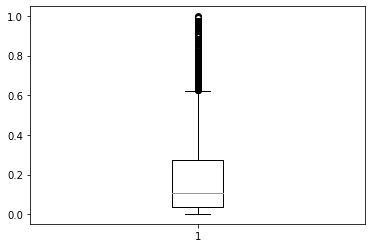

In [764]:
plt.boxplot(temp_df[temp_df['30_roi']<=1]['30_roi'])
plt.show()

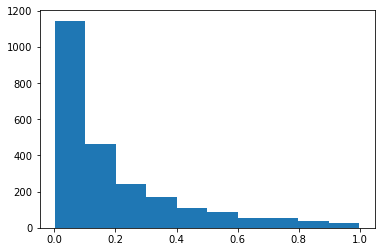

In [765]:
plt.hist(temp_df[temp_df['30_roi']<=1]['30_roi'])
plt.show()

In [766]:
temp_df.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum,30_roi,label
11264,20754,321941,0,2020-06-27,2020-06-24,1001049,1,18998.77,3897,4.875230,8,2374.84625,774,0.040739,0.0182,0.00205,14028,0.738364,0
15931,6867,322571,0,2020-06-28,2020-06-28,1000840,1,573.17,22,26.053182,1,573.17000,80,0.139575,0.0000,0.04545,80,0.139575,0
15951,20540,322413,0,2020-06-28,2020-06-28,1000840,1,2830.19,131,21.604504,1,2830.19000,12,0.004240,0.0382,0.00763,12,0.004240,0
15952,20540,322414,0,2020-06-28,2020-06-28,1000840,1,4716.98,203,23.236355,2,2358.49000,146,0.030952,0.0345,0.00985,868,0.184016,0
15953,20646,321028,0,2020-06-28,2020-06-20,1000840,1,2336.42,73,32.005753,1,2336.42000,110,0.047081,0.0822,0.01370,594,0.254235,0


In [789]:
# temp_df.to_csv('./temp_df.csv')
# 手动打标签 1差；0好
# 付费人数=1  标1；付费人数=2且金额=24 标1；
# 安卓付费成本>2500 标1  （其中# roi>8% 且付费人数>=2 且付费率>=0.015 改标0）
# IOS付费成本>4000 标1  （其中# roi>8% 且付费人数>=2 且付费率>=0.015 改标0）
# 付费人数=2 且roi<=0.02 标1
# 安卓付费成本>60标1；IOS创角成本>100标1
# 其它roi<=0.15 标1
# 其它标0

In [791]:
# temp_df = pd.read_csv('./temp_df.csv',index_col=0)

In [792]:
temp_df.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_pay_rate,create_role_30_pay_sum,30_roi,label
207,21117,329767,0,2020/7/25,2020/7/13,1000993,2,23021.47,250,92.085880,2,11510.73500,72,0.003128,0.00800,340,0.014769,1
15931,6867,322571,0,2020/6/28,2020/6/28,1000840,1,573.17,22,26.053182,1,573.17000,80,0.139575,0.04545,80,0.139575,1
15951,20540,322413,0,2020/6/28,2020/6/28,1000840,1,2830.19,131,21.604504,1,2830.19000,12,0.004240,0.00763,12,0.004240,1
6100,20452,335297,0,2020/7/26,2020/7/23,1000993,2,33279.20,200,166.396000,3,11093.06667,1916,0.057573,0.01500,2202,0.066167,1
15953,20646,321028,0,2020/6/28,2020/6/20,1000840,1,2336.42,73,32.005753,1,2336.42000,110,0.047081,0.01370,594,0.254235,1


In [200]:
# temp_df['label'] = temp_df['30_roi'].apply(lambda x :1 if x>=0.47 else 0)
# temp_df['label'] = temp_df.apply(lambda x:1 if x.create_role_pay_cost<=2500 else (1 if x.create_role_roi>=0.02 else(1 if 
#                 x.create_role_pay_rate>=0.03 else 0)), axis=1)                                                                                                          

In [212]:
# temp_df['label'] = temp_df.apply(lambda x:1 if (x.create_role_pay_cost<=2500)&(x.create_role_roi>=0.02)&
#                                  (x.create_role_pay_rate>=0.03)  else 0, axis=1)                                                                                                          

In [793]:
temp_df['label'].value_counts()

1    2415
0     387
Name: label, dtype: int64

In [794]:
import lightgbm as lgb
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler, StandardScaler
from sklearn.metrics import recall_score, auc, accuracy_score, f1_score, precision_score, classification_report, roc_auc_score,mean_squared_error
from sklearn.metrics import mean_absolute_error

In [796]:
temp_df[['source_run_date_amount','platform',
       'create_role_num', 'create_role_cost', 'create_role_pay_num',
       'create_role_pay_cost', 'create_role_pay_sum', 'create_role_roi', 'create_role_pay_rate','label']].corr()['label'].sort_values()

create_role_pay_num      -0.281180
create_role_pay_sum      -0.191612
create_role_num          -0.141505
source_run_date_amount   -0.098083
create_role_roi          -0.091567
platform                  0.022819
create_role_pay_rate      0.062719
create_role_cost          0.152182
create_role_pay_cost      0.249271
label                     1.000000
Name: label, dtype: float64

In [797]:
data_train = temp_df[['source_run_date_amount',
       'create_role_num', 'create_role_cost', 'create_role_pay_num',
       'create_role_pay_cost', 'create_role_pay_sum', 'create_role_roi', 'create_role_pay_rate','label']]

In [798]:
data_train.shape

(2802, 9)

In [799]:
data_Train,data_Test = train_test_split(data_train,test_size=0.2)

In [800]:
target = data_Train['label']
features = data_Train.drop(['label'], axis=1)
X_val, x_test, Y_val, y_test = train_test_split(features,target, test_size=0.2)

In [801]:
# 使用GBDT模型预测
from sklearn.ensemble import GradientBoostingClassifier
gbdt_win0 = GradientBoostingClassifier()
gbdt_win0.fit(X_val, Y_val)
y_predict = gbdt_win0.predict(x_test)

In [802]:
print(classification_report( y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        64
           1       0.96      0.99      0.98       385

    accuracy                           0.96       449
   macro avg       0.96      0.89      0.92       449
weighted avg       0.96      0.96      0.96       449



In [337]:
# y_predict = pd.Series(y_predict[:,1])
# y_predict_val = y_predict.apply(lambda x:1 if x>=0.6 else 0)

In [803]:
print(recall_score( y_test, y_predict, average=None))
print(precision_score( y_test, y_predict))
print(accuracy_score( y_test, y_predict))
print(f1_score( y_test, y_predict))

[0.78125    0.99480519]
0.964735516372796
0.9643652561247216
0.9795396419437341


In [824]:
joblib.dump(gbdt_win0,'gbdt_win0.pkl')

['gbdt_win0.pkl']

In [805]:
temp_df['label_pre'] = gbdt_win0.predict(temp_df[['source_run_date_amount',
       'create_role_num', 'create_role_cost', 'create_role_pay_num',
       'create_role_pay_cost', 'create_role_pay_sum', 'create_role_roi', 'create_role_pay_rate']])
temp_df['label_pre'] = temp_df['label_pre'].apply(lambda x:3 if x==1 else 4)

In [807]:
temp_df['label_pre'].value_counts()

3    2439
4     363
Name: label_pre, dtype: int64

In [809]:
temp_df[temp_df['label_pre']==3]['create_role_30_pay_sum'].sum()/temp_df[temp_df['label_pre']==3]['source_run_date_amount'].sum()

0.5906967534169923

In [810]:
temp_df[temp_df['label_pre']==4]['create_role_30_pay_sum'].sum()/temp_df[temp_df['label_pre']==4]['source_run_date_amount'].sum()

0.9551439877025414

In [811]:
result_df[result_df['label']==2]['create_role_30_pay_sum'].sum()/result_df[result_df['label']==2]['source_run_date_amount'].sum()

0.14629801211443344

In [812]:
result_df[result_df['label']==1]['create_role_30_pay_sum'].sum()/result_df[result_df['label']==1]['source_run_date_amount'].sum()

0.03094994351978452

In [820]:
result = pd.concat([result_df.drop('create_role_retain_1d',axis=1),temp_df.drop('label',axis=1).rename(columns={'label_pre':'label'})],axis=0)

In [821]:
temp_df.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_pay_rate,create_role_30_pay_sum,30_roi,label,label_pre
207,21117,329767,0,2020/7/25,2020/7/13,1000993,2,23021.47,250,92.085880,2,11510.73500,72,0.003128,0.00800,340,0.014769,1,3
15931,6867,322571,0,2020/6/28,2020/6/28,1000840,1,573.17,22,26.053182,1,573.17000,80,0.139575,0.04545,80,0.139575,1,3
15951,20540,322413,0,2020/6/28,2020/6/28,1000840,1,2830.19,131,21.604504,1,2830.19000,12,0.004240,0.00763,12,0.004240,1,3
6100,20452,335297,0,2020/7/26,2020/7/23,1000993,2,33279.20,200,166.396000,3,11093.06667,1916,0.057573,0.01500,2202,0.066167,1,3
15953,20646,321028,0,2020/6/28,2020/6/20,1000840,1,2336.42,73,32.005753,1,2336.42000,110,0.047081,0.01370,594,0.254235,1,3


In [822]:
result.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_pay_rate,create_role_30_pay_sum,30_roi,label
11258,6867,318975,0,2020-06-27,2020-06-12 00:00:00,1001049,1,1542.94,28,55.105000,0,0.0,0,0.0,0.0,12,0.007777,2
11262,20754,318396,0,2020-06-27,2020-06-11 00:00:00,1001049,1,2124.25,34,62.477941,0,0.0,0,0.0,0.0,0,0.000000,2
11267,20754,322323,0,2020-06-27,2020-06-25 00:00:00,1001049,1,4235.28,542,7.814170,0,0.0,0,0.0,0.0,0,0.000000,2
11268,20754,322358,0,2020-06-27,2020-06-27 00:00:00,1001049,1,3459.11,286,12.094790,0,0.0,0,0.0,0.0,456,0.131826,2
11269,20754,322359,0,2020-06-27,2020-06-27 00:00:00,1001049,1,3459.11,270,12.811519,0,0.0,0,0.0,0.0,0,0.000000,2


In [823]:
result['label'].value_counts()

2    7423
3    2439
1    2211
4     363
Name: label, dtype: int64

## 计划状态2

In [647]:
# win=1
# 训练

In [1046]:
result_win1 = pd.DataFrame()
temp_win1 = pd.DataFrame()

In [713]:
# win = 1 训练数据
# data_win_1['label'] = data_win_1.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_sum==0 else(
#              1 if x.create_role_pay_cost > 6000 else(1 if x.create_role_cost >=60 else 2))),axis=1)
# data_win_1_ios['label'] = data_win_1_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_sum==0 else(
#              1 if x.create_role_pay_cost > 10000 else(1 if x.create_role_cost >=160 else 2))),axis=1)

In [1047]:
result_win1 = result_win1.append(data_win_1[(data_win_1['label'] == 1)| (data_win_1['label'] == 0)]).append(data_win_1_ios[(data_win_1_ios['label'] == 1)|(data_win_1_ios['label'] == 0)])
temp_win1 = temp_win1.append(data_win_1[data_win_1['label'] == 2]).append(data_win_1_ios[data_win_1_ios['label'] == 2])

In [1048]:
temp_win1.shape

(200, 19)

In [751]:
# result_df_2.to_csv('./result_df_2.csv')

In [859]:
# temp_win1.drop('create_role_retain_1d',axis=1,inplace=True)

In [860]:
temp_win1['create_role_roi'].describe()

count    1301.000000
mean        0.019267
std         0.057786
min         0.002724
25%         0.008700
50%         0.012571
75%         0.017470
max         1.795994
Name: create_role_roi, dtype: float64

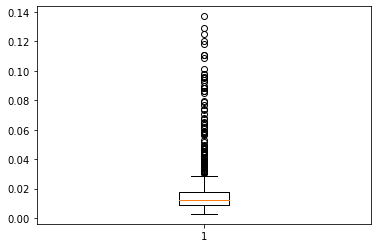

In [861]:
plt.boxplot(temp_win1[temp_win1['create_role_roi']<=0.15]['create_role_roi'])
plt.show()

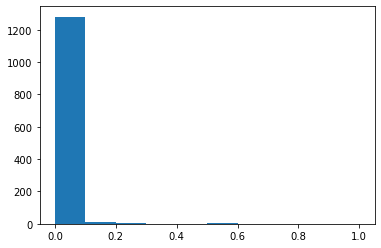

In [862]:
plt.hist(temp_win1['create_role_roi'],range=(0,1))
plt.show()

In [687]:
# temp_df_2['create_role_roi_sorce'] = temp_df_2['create_role_roi'].apply(lambda x:1 if x<=0.015 else(2 if x<=0.03 else(3 
#                         if x<=0.065 else(4 if x<=0.2 else 5))))
# temp_df_2['create_role_pay_num_sorce'] = temp_df_2['create_role_pay_num'].apply(lambda x:0 if x<=1 else 2)
# temp_df_2['create_role_pay_sum_sorce'] = temp_df_2['create_role_pay_sum'].apply(lambda x:0 if x<=12 else 2)
# temp_df_2['source_run_date_amount_sorce'] = temp_df_2['source_run_date_amount'].apply(lambda x:0 if x<=1000 else(1 if
#                                                                     x<=2000 else 2))
# temp_df_2['create_role_pay_cost_sorce'] = temp_df_2.apply(lambda x:3 if (x.platform==1)&(x.create_role_pay_cost<=2500) 
#         else(2 if (x.platform==1)&(x.create_role_pay_cost<=3500) else(1 if (x.platform==1)&(x.create_role_pay_cost<=4500)
#         else (0 if (x.platform==1) else(3 if (x.platform==2)&(x.create_role_pay_cost<=4500) else(2 if
#         (x.platform==2)&(x.create_role_pay_cost<=6500) else(1 if (x.platform==2)&(x.create_role_pay_cost<=8000) else
#                     0 )))))),axis=1)
# temp_df_2['create_role_cost_sorce'] = temp_df_2.apply(lambda x:3 if (x.platform==1)&(x.create_role_cost<=20) 
#         else(2 if (x.platform==1)&(x.create_role_cost<=35) else(1 if (x.platform==1)&(x.create_role_cost<=50)
#         else (0 if (x.platform==1) else(3 if (x.platform==2)&(x.create_role_cost<=50) else(2 if
#         (x.platform==2)&(x.create_role_cost<=80) else(1 if (x.platform==2)&(x.create_role_cost<=120) else
#                     0)))))),axis=1)
# temp_df_2['create_role_pay_rate_sorce'] = temp_df_2['create_role_pay_rate'].apply(lambda x:1 if x<=0.01 else(2 if x<=0.03 else(3 
#                         if x<=0.05 else(4 if x<=0.08 else 5))))
# temp_df_2['sorce'] = 0.3*temp_df_2['create_role_roi_sorce']+0.15*temp_df_2['create_role_pay_num_sorce']+0.3*temp_df_2['create_role_pay_sum_sorce']+0.2*temp_df_2['source_run_date_amount_sorce']+0.2*temp_df_2['create_role_pay_cost_sorce']+0.1*temp_df_2['create_role_cost_sorce']+0.1*temp_df_2['create_role_pay_rate_sorce']

In [719]:
# plt.hist(temp_df_2['sorce'])
# plt.show()

In [697]:
# temp_df_2.to_csv('./temp_df_2.csv')

In [720]:
temp_df_2['label'] = temp_df_2.apply(lambda x :0 if (x.platform==1)&(x['30_roi']>=0.2) else (0 if (x.platform==2)&(x['30_roi']>=0.18) else 1),axis=1)

In [722]:
temp_df_2[['source_run_date_amount','platform',
       'create_role_num', 'create_role_cost', 'create_role_pay_num',
       'create_role_pay_cost', 'create_role_pay_sum', 'create_role_roi', 'create_role_pay_rate','label']].corr()['label'].sort_values()

create_role_pay_sum      -0.282546
create_role_roi          -0.272351
create_role_pay_num      -0.173498
source_run_date_amount   -0.120404
create_role_num          -0.094791
create_role_pay_rate     -0.049793
platform                 -0.000126
create_role_cost          0.053421
create_role_pay_cost      0.147425
label                     1.000000
Name: label, dtype: float64

In [729]:
data_train_win1 = temp_df_2[['create_role_cost',
       'create_role_pay_cost', 'create_role_roi','create_role_pay_rate','label']]

In [730]:
target = data_train_win1['label']
features = data_train_win1.drop(['label'], axis=1)
X_val, x_test, Y_val, y_test = train_test_split(features,target, test_size=0.2)

In [731]:
gbdt_b_win1 = GradientBoostingClassifier()
gbdt_b_win1.fit(X_val, Y_val)
y_predict_win1 = gbdt_b_win1.predict(x_test)

In [732]:
print(recall_score( y_test, y_predict_win1, average=None))
print(precision_score( y_test, y_predict_win1))
print(accuracy_score( y_test, y_predict_win1))
print(f1_score( y_test, y_predict_win1))

[0.61494253 0.83265306]
0.7527675276752768
0.7422434367541766
0.7906976744186046


In [733]:
print(classification_report( y_test, y_predict_win1))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       348
           1       0.75      0.83      0.79       490

    accuracy                           0.74       838
   macro avg       0.74      0.72      0.73       838
weighted avg       0.74      0.74      0.74       838



In [739]:
joblib.dump(gbdt_b_win1,'gbdt_b_win1.pkl')

['gbdt_b_win1.pkl']

In [1061]:
# 分类
result_win1 = pd.DataFrame()
temp_win1 = pd.DataFrame()

In [1060]:
data_win_1.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum,30_roi,label
4590,20953,317165,1,2020-06-06,2020-06-05,1001049,1,567.89,4,141.972500,0,0.000,0,0.000000,0.2500,0.00000,0,0.000000,1
4587,20953,317143,1,2020-06-06,2020-06-05,1000840,1,2170.64,0,2170.640000,0,0.000,0,0.000000,0.0000,0.00000,0,0.000000,1
392,20953,335026,1,2020-07-25,2020-07-23,1000840,1,15347.37,238,64.484748,5,3069.474,222,0.014465,0.1429,0.02101,704,0.045871,1
391,20953,335025,1,2020-07-25,2020-07-23,1000840,1,11047.62,287,38.493449,5,2209.524,248,0.022448,0.1220,0.01742,550,0.049784,0
390,20953,335024,1,2020-07-25,2020-07-23,1000840,1,8893.10,155,57.374839,4,2223.275,66,0.007422,0.0774,0.02581,324,0.036433,1


In [1062]:
data_win_1['label'] = data_win_1.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
        (1 if (x.create_role_pay_cost>=6000)&(x.create_role_roi<=0.02) else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
        (0 if (x.source_run_date_amount>10000)&(x.create_role_pay_cost<=6500)&(x.create_role_roi>0.03) else 
         (0 if (x.source_run_date_amount<=10000)&(x.create_role_roi>0.03) else
          (1 if x.create_role_roi<=0.015 else
         (0 if (x.create_role_pay_cost<=4000)&(x.create_role_roi>=0.015) else 2 ))))))), axis=1)

data_win_1_ios['label'] = data_win_1_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
        (1 if (x.create_role_pay_cost>=10000)&(x.create_role_roi<=0.02) else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
        (0 if (x.source_run_date_amount>15000)&(x.create_role_pay_cost<=9000)&(x.create_role_roi>0.03) else 
         (0 if (x.source_run_date_amount<=15000)&(x.create_role_roi>0.03) else
          (1 if x.create_role_roi<=0.015 else
         (0 if (x.create_role_pay_cost<=6000)&(x.create_role_roi>=0.015) else 2 ))))))), axis=1)

In [1063]:
result_win1 = result_win1.append(data_win_1[(data_win_1['label'] == 1)| (data_win_1['label'] == 0)]).append(data_win_1_ios[(data_win_1_ios['label'] == 1)|(data_win_1_ios['label'] == 0)])
temp_win1 = temp_win1.append(data_win_1[data_win_1['label'] == 2]).append(data_win_1_ios[data_win_1_ios['label'] == 2])

In [ ]:
# data_win_1['label'] = data_win_1.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
#         (1 if x.create_role_pay_cost>=6000 else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
#         (1 if x.create_role_cost >=60 else (0 if (x.create_role_pay_cost<=4000)&(x.create_role_roi>=0.02) else
#         (0 if (x.create_role_pay_num>=2)&(x.create_role_pay_rate>=0.03) else 2 )))))), axis=1)
# data_win_1_ios['label'] = data_win_1_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
#         (1 if x.create_role_pay_cost>=10000 else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
#         (1 if x.create_role_cost >=160 else (0 if (x.create_role_pay_cost<=8000)&(x.create_role_roi>=0.02) else
#         (0 if (x.create_role_pay_num>=2)&(x.create_role_pay_rate>=0.03) else 2 )))))), axis=1)

In [1064]:
temp_win1['label'] = gbdt_b_win1.predict(temp_win1[['create_role_cost',
       'create_role_pay_cost', 'create_role_roi','create_role_pay_rate']])

In [1066]:
temp_win1[temp_win1['label']==1]['create_role_30_pay_sum'].sum() / temp_win1[temp_win1['label']==1]['source_run_date_amount'].sum()

0.2328176387542382

In [1067]:
temp_win1[temp_win1['label']==0]['create_role_30_pay_sum'].sum() / temp_win1[temp_win1['label']==0]['source_run_date_amount'].sum()

0.49333474233251295

In [1068]:
result_win1_data = pd.concat([result_win1,temp_win1],axis=0)

In [1069]:
result_win1_data[result_win1_data['label']==1]['create_role_30_pay_sum'].sum() / result_win1_data[result_win1_data['label']==1]['source_run_date_amount'].sum()

0.11341384015243555

In [1070]:
result_win1_data[result_win1_data['label']==0]['create_role_30_pay_sum'].sum() / result_win1_data[result_win1_data['label']==0]['source_run_date_amount'].sum()

0.728737836515545

In [1071]:
result_win1_data['label'].value_counts()

1    11660
0     3287
Name: label, dtype: int64

In [1072]:
temp_win1.to_csv('./temp_win1.csv')
result_win1.to_csv('./result_win1.csv')

### win=2

In [1073]:
# 训练
result_win2 = pd.DataFrame()
temp_win2 = pd.DataFrame()

In [1074]:
data_win_2.shape

(9137, 19)

In [981]:
print(data_win_1['source_run_date_amount'].sum() / data_win_1['create_role_pay_num'].sum())
print(data_win_2['source_run_date_amount'].sum() / data_win_2['create_role_pay_num'].sum())
print(data_win_1['source_run_date_amount'].sum() / data_win_1['create_role_num'].sum())
print(data_win_2['source_run_date_amount'].sum() / data_win_2['create_role_num'].sum())
print(data_win_1_ios['source_run_date_amount'].sum() / data_win_1_ios['create_role_pay_num'].sum())
print(data_win_2_ios['source_run_date_amount'].sum() / data_win_2_ios['create_role_pay_num'].sum())
print(data_win_1_ios['source_run_date_amount'].sum() / data_win_1_ios['create_role_num'].sum())
print(data_win_2_ios['source_run_date_amount'].sum() / data_win_2_ios['create_role_num'].sum())

3638.7253055748783
2987.3074975094637
21.345434950522467
20.264470002608526
5933.83654054054
4792.622422932873
51.73419206090266
47.608559510726465


In [887]:
# # win = 2 训练数据
# data_win_2['label'] = data_win_2.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_sum==0 else(
#              1 if x.create_role_pay_cost > 5000 else(1 if x.create_role_cost >=50 else 2))),axis=1)
# data_win_2_ios['label'] = data_win_2_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_sum==0 else(
#              1 if x.create_role_pay_cost > 8000 else(1 if x.create_role_cost >=140 else 2))),axis=1)

In [888]:
# result_win2 = result_win2.append(data_win_2[(data_win_2['label'] == 1)| (data_win_2['label'] == 0)]).append(data_win_2_ios[(data_win_2_ios['label'] == 1)|(data_win_2_ios['label'] == 0)])
# temp_win2 = temp_win2.append(data_win_2[data_win_2['label'] == 2]).append(data_win_2_ios[data_win_2_ios['label'] == 2])

In [890]:
# temp_win2['label'].value_counts()

2    4505
Name: label, dtype: int64

In [891]:
# temp_win2['label'] = temp_win2.apply(lambda x :0 if (x.platform==1)&(x['30_roi']>=0.2) else (0 if (x.platform==2)&(x['30_roi']>=0.18) else 1),axis=1)

In [892]:
# temp_win2['label'].value_counts()

1    2658
0    1847
Name: label, dtype: int64

In [894]:
# temp_win2[['source_run_date_amount','platform',
#        'create_role_num', 'create_role_cost', 'create_role_pay_num',
#        'create_role_pay_cost', 'create_role_pay_sum', 'create_role_roi', 'create_role_retain_1d','create_role_pay_rate','label']].corr()['label'].sort_values()

create_role_pay_sum      -0.300861
create_role_roi          -0.294614
create_role_pay_num      -0.193416
source_run_date_amount   -0.148984
create_role_num          -0.117059
create_role_pay_rate     -0.078142
create_role_retain_1d    -0.053385
platform                 -0.005444
create_role_cost          0.043161
create_role_pay_cost      0.167003
label                     1.000000
Name: label, dtype: float64

In [895]:
data_train_win2 = temp_win2[['create_role_cost',
       'create_role_pay_cost', 'create_role_roi','create_role_pay_rate','create_role_retain_1d','label']]

In [896]:
target = data_train_win2['label']
features = data_train_win2.drop(['label'], axis=1)
X_val, x_test, Y_val, y_test = train_test_split(features,target, test_size=0.2)

In [897]:
gbdt_b_win2 = GradientBoostingClassifier()
gbdt_b_win2.fit(X_val, Y_val)
y_predict_win2 = gbdt_b_win2.predict(x_test)

In [898]:
print(recall_score( y_test, y_predict_win2, average=None))
print(precision_score( y_test, y_predict_win2))
print(accuracy_score( y_test, y_predict_win2))
print(f1_score( y_test, y_predict_win2))

[0.63157895 0.85220729]
0.7602739726027398
0.7591564927857936
0.8036199095022625


In [899]:
print(classification_report( y_test, y_predict_win2))

              precision    recall  f1-score   support

           0       0.76      0.63      0.69       380
           1       0.76      0.85      0.80       521

    accuracy                           0.76       901
   macro avg       0.76      0.74      0.75       901
weighted avg       0.76      0.76      0.76       901



In [900]:
joblib.dump(gbdt_b_win2,'gbdt_b_win2.pkl')

['gbdt_b_win2.pkl']

In [ ]:
# 分类

In [1075]:
result_win2 = pd.DataFrame()
temp_win2 = pd.DataFrame()
data_win_2.shape

(9137, 19)

In [1076]:
data_win_2_ios.shape

(3723, 19)

In [1077]:
data_win_2['label'] = data_win_2.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
        (1 if (x.create_role_pay_cost>=5000)&(x.create_role_roi<=0.05) else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
        (0 if (x.source_run_date_amount>10000)&(x.create_role_pay_cost<=5500)&(x.create_role_roi>0.06) else 
         (0 if (x.source_run_date_amount<=10000)&(x.create_role_roi>0.06) else
          (1 if x.create_role_roi<=0.035 else
         (0 if (x.create_role_pay_cost<=3800)&(x.create_role_roi>=0.035) else 2 ))))))), axis=1)

data_win_2_ios['label'] = data_win_2_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
        (1 if (x.create_role_pay_cost>=8000)&(x.create_role_roi<=0.07) else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
        (0 if (x.source_run_date_amount>15000)&(x.create_role_pay_cost<=8500)&(x.create_role_roi>0.07) else 
         (0 if (x.source_run_date_amount<=15000)&(x.create_role_roi>0.07) else
          (1 if x.create_role_roi<=0.04 else
         (0 if (x.create_role_pay_cost<=5500)&(x.create_role_roi>=0.04) else 2 ))))))), axis=1)

In [912]:
# data_win_2['label'] = data_win_2.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
#         (1 if x.create_role_pay_cost>=5000 else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
#         (1 if x.create_role_cost >=50 else (0 if (x.create_role_pay_cost<=3800)&(x.create_role_roi>=0.03) else
#         (0 if (x.create_role_pay_num>=3)&(x.create_role_pay_rate>=0.03) else 2 )))))), axis=1)
# data_win_2_ios['label'] = data_win_2_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
#         (1 if x.create_role_pay_cost>=8000 else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
#         (1 if x.create_role_cost >=140 else (0 if (x.create_role_pay_cost<=7300)&(x.create_role_roi>=0.03) else
#         (0 if (x.create_role_pay_num>=3)&(x.create_role_pay_rate>=0.03) else 2 )))))), axis=1)

In [1078]:
result_win2 = result_win2.append(data_win_2[(data_win_2['label'] == 1)| (data_win_2['label'] == 0)]).append(data_win_2_ios[(data_win_2_ios['label'] == 1)|(data_win_2_ios['label'] == 0)])
temp_win2 = temp_win2.append(data_win_2[data_win_2['label'] == 2]).append(data_win_2_ios[data_win_2_ios['label'] == 2])

In [1079]:
temp_win2['label'] = gbdt_b_win2.predict(temp_win2[['create_role_cost',
       'create_role_pay_cost', 'create_role_roi','create_role_pay_rate','create_role_retain_1d']])

In [1080]:
result_win2_data = pd.concat([result_win2,temp_win2],axis=0)

In [1081]:
result_win2_data['label'].value_counts()

1    10174
0     2686
Name: label, dtype: int64

In [1082]:
result_win2_data[result_win2_data['label']==1]['create_role_30_pay_sum'].sum() / result_win2_data[result_win2_data['label']==1]['source_run_date_amount'].sum()

0.14332606393437675

In [1083]:
result_win2_data[result_win2_data['label']==0]['create_role_30_pay_sum'].sum() / result_win2_data[result_win2_data['label']==0]['source_run_date_amount'].sum()

0.7951680074337124

In [1084]:
temp_win2.to_csv('./temp_win2.csv')

In [1085]:
result_win2.to_csv('./result_win2.csv')

### win=3

In [921]:
# 训练阶段

In [920]:
result_win3 = pd.DataFrame()
temp_win3 = pd.DataFrame()

In [923]:
print(data_win_2['source_run_date_amount'].sum() / data_win_2['create_role_pay_num'].sum())
print(data_win_2['source_run_date_amount'].sum() / data_win_2['create_role_num'].sum())
print(data_win_2_ios['source_run_date_amount'].sum() / data_win_2_ios['create_role_pay_num'].sum())
print(data_win_2_ios['source_run_date_amount'].sum() / data_win_2_ios['create_role_num'].sum())

2987.3074975094637
20.264470002608526
4792.622422932873
47.608559510726465


In [922]:
print(data_win_3['source_run_date_amount'].sum() / data_win_3['create_role_pay_num'].sum())
print(data_win_3['source_run_date_amount'].sum() / data_win_3['create_role_num'].sum())
print(data_win_3_ios['source_run_date_amount'].sum() / data_win_3_ios['create_role_pay_num'].sum())
print(data_win_3_ios['source_run_date_amount'].sum() / data_win_3_ios['create_role_num'].sum())

2566.4044842839303
19.48318336684827
4043.1046155622257
44.92038831140846


In [924]:
# win = 3 训练数据
data_win_3['label'] = data_win_3.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_sum==0 else(
             1 if x.create_role_pay_cost > 4300 else(1 if x.create_role_cost >=45 else 2))),axis=1)
data_win_3_ios['label'] = data_win_3_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_sum==0 else(
             1 if x.create_role_pay_cost > 6500 else(1 if x.create_role_cost >=130 else 2))),axis=1)

In [925]:
result_win3 = result_win3.append(data_win_3[(data_win_3['label'] == 1)| (data_win_3['label'] == 0)]).append(data_win_3_ios[(data_win_3_ios['label'] == 1)|(data_win_3_ios['label'] == 0)])
temp_win3 = temp_win3.append(data_win_3[data_win_3['label'] == 2]).append(data_win_3_ios[data_win_3_ios['label'] == 2])

In [926]:
temp_win3['label'] = temp_win3.apply(lambda x :0 if (x.platform==1)&(x['30_roi']>=0.2) else (0 if (x.platform==2)&(x['30_roi']>=0.18) else 1),axis=1)

In [927]:
data_train_win3 = temp_win3[['create_role_cost',
       'create_role_pay_cost', 'create_role_roi','create_role_pay_rate','create_role_retain_1d','label']]

In [928]:
target = data_train_win3['label']
features = data_train_win3.drop(['label'], axis=1)
X_val, x_test, Y_val, y_test = train_test_split(features,target, test_size=0.2)
gbdt_b_win3 = GradientBoostingClassifier()
gbdt_b_win3.fit(X_val, Y_val)
y_predict_win3 = gbdt_b_win3.predict(x_test)

In [930]:
print(classification_report( y_test, y_predict_win3))

              precision    recall  f1-score   support

           0       0.80      0.68      0.74       397
           1       0.77      0.86      0.81       491

    accuracy                           0.78       888
   macro avg       0.79      0.77      0.77       888
weighted avg       0.78      0.78      0.78       888



In [931]:
joblib.dump(gbdt_b_win3,'gbdt_b_win3.pkl')

['gbdt_b_win3.pkl']

In [932]:
# 分类

In [1086]:
result_win3 = pd.DataFrame()
temp_win3 = pd.DataFrame()

In [ ]:
# 付费金额10000以上    关
# 付费成本超标&roi<=0.08 ；
# roi 达标 付费成本达标 开
# 开
# 付费成本不超标&roi

In [1087]:
data_win_3['label'] = data_win_3.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
        (1 if (x.create_role_pay_cost>=4300)&(x.create_role_roi<=0.07) else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
        (0 if (x.source_run_date_amount>10000)&(x.create_role_pay_cost<=5000)&(x.create_role_roi>0.08) else 
         (0 if (x.source_run_date_amount<=10000)&(x.create_role_roi>0.08) else
          (1 if x.create_role_roi<=0.05 else
         (0 if (x.create_role_pay_cost<=3500)&(x.create_role_roi>=0.05) else 2 ))))))), axis=1)

data_win_3_ios['label'] = data_win_3_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
        (1 if (x.create_role_pay_cost>=7000)&(x.create_role_roi<=0.08) else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
        (0 if (x.source_run_date_amount>15000)&(x.create_role_pay_cost<=8000)&(x.create_role_roi>0.09) else 
         (0 if (x.source_run_date_amount<=15000)&(x.create_role_roi>0.09) else
          (1 if x.create_role_roi<=0.06 else
         (0 if (x.create_role_pay_cost<=5000)&(x.create_role_roi>=0.06) else 2 ))))))), axis=1)


In [934]:
# data_win_3['label'] = data_win_3.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
#         (1 if x.create_role_pay_cost>=4300 else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
#         (1 if x.create_role_cost >=45 else (0 if (x.create_role_pay_cost<=3500)&(x.create_role_roi>=0.05) else
#         (0 if (x.create_role_pay_num>=3)&(x.create_role_pay_rate>=0.03) else 2 )))))), axis=1)
# data_win_3_ios['label'] = data_win_3_ios.apply(lambda x:1 if x.create_role_num == 0 else (1 if x.create_role_pay_num==0 else 
#         (1 if x.create_role_pay_cost>=6500 else(1 if (x.create_role_pay_num==1)&(x.create_role_pay_sum==12) else
#         (1 if x.create_role_cost >=130 else (0 if (x.create_role_pay_cost<=6200)&(x.create_role_roi>=0.05) else
#         (0 if (x.create_role_pay_num>=3)&(x.create_role_pay_rate>=0.03) else 2 )))))), axis=1)

In [1088]:
result_win3 = result_win3.append(data_win_3[(data_win_3['label'] == 1)| (data_win_3['label'] == 0)]).append(data_win_3_ios[(data_win_3_ios['label'] == 1)|(data_win_3_ios['label'] == 0)])
temp_win3 = temp_win3.append(data_win_3[data_win_3['label'] == 2]).append(data_win_3_ios[data_win_3_ios['label'] == 2])

In [1089]:
temp_win3['label'] = gbdt_b_win3.predict(temp_win3[['create_role_cost',
       'create_role_pay_cost', 'create_role_roi','create_role_pay_rate','create_role_retain_1d']])

In [1090]:
result_win3_data = pd.concat([result_win3,temp_win3],axis=0)

In [1091]:
result_win3_data['label'].value_counts()

1    8338
0    2310
Name: label, dtype: int64

In [1092]:
data_win_3.shape

(7640, 19)

In [1093]:
data_win_3_ios.shape

(3008, 19)

In [1094]:
result_win3_data[result_win3_data['label']==1]['create_role_30_pay_sum'].sum() / result_win3_data[result_win3_data['label']==1]['source_run_date_amount'].sum()

0.16729634523879947

In [1095]:
result_win3_data[result_win3_data['label']==0]['create_role_30_pay_sum'].sum() / result_win3_data[result_win3_data['label']==0]['source_run_date_amount'].sum()

0.8510175007005686

In [1096]:
temp_win3.to_csv('./temp_win3.csv')

In [1097]:
result_win3.to_csv('./result_win3.csv')

## win=7

In [32]:
data_win_7['label'] = data_win_7.apply(lambda x: 1 if x.create_role_num == 0 else(1 if x.create_role_pay_num == 0 
                else(1 if (x.create_role_pay_cost >= 4200) & (x.create_role_roi <= 0.06) else (1 if 
                    (x.create_role_pay_num == 1) & ( x.create_role_pay_sum == 12) else( 0 if (x.create_role_cost <= 50) 
                       & (x.create_role_roi >= 0.11) & (x.create_role_pay_cost <= 4000) else( 0 if 
                            (x.source_run_date_amount > 10000) & (x.create_role_pay_cost <= 4200) & (x.create_role_roi >= 0.09) 
                                    else (0 if (x.source_run_date_amount <= 10000) & (x.create_role_pay_cost <= 5000) & (x.create_role_roi >= 0.08) else(1 if x.create_role_roi <= 0.05 else(0 if (x.create_role_pay_cost <= 3500) & (
                                    x.create_role_roi >= 0.06) else 2)))))))), axis=1)

In [33]:
data_win_7['label'].value_counts()

1    7086
0    3771
2     604
Name: label, dtype: int64

In [1]:
# data_win_7['label'] = data_win_7.apply(
#             lambda x: 1 if x.create_role_num == 0 else (1 if x.create_role_pay_num == 0 else
#                 (1 if (x.create_role_pay_cost >= 4200) & (x.create_role_roi <= 0.06) else (
#                     1 if (x.create_role_pay_num == 1) & ( x.create_role_pay_sum == 12) else(
#                         0 if (x.create_role_cost <= 50) & (x.create_role_roi >= 0.11) & (x.create_role_pay_cost <= 4000)
#                             else (0 if (x.source_run_date_amount > 10000) & (
#                                         x.create_role_pay_cost <= 4200) & (
#                                             x.create_role_roi >= 0.09) else
#                                                              (x.source_run_date_amount <= 10000) & (
#                         x.create_role_pay_cost <= 5000) & (
#                              x.create_role_roi >= 0.08) else(1 if x.create_role_roi <= 0.05 else (
#                                                                   0 if (x.create_role_pay_cost <= 3500) & (
#                                                                           x.create_role_roi >= 0.06) else 2))))))),
#             axis=1)

In [24]:
data_win_7['label'] = data_win_7.apply(
            lambda x: 0 if (x.create_role_cost <= 50) & (x.create_role_roi >= 0.11) & (
                    x.create_role_pay_cost <= 4000) else (0 if (x.source_run_date_amount > 10000) & (
                    x.create_role_pay_cost <= 4200) & (x.create_role_roi >= 0.09) else (
                0 if (x.source_run_date_amount <= 10000) & (
                        x.create_role_pay_cost <= 5000) & (
                             x.create_role_roi >= 0.08) else (0 if (x.create_role_pay_cost <= 3500) & (
                        x.create_role_roi >= 0.06) else 1))), axis=1)

data_win_7_ios['label'] = data_win_7_ios.apply(
    lambda x: 0 if (x.create_role_cost <= 100) & (x.create_role_roi >= 0.10) & (
            x.create_role_pay_cost <= 7000) else (0 if (x.source_run_date_amount > 15000) & (
            x.create_role_pay_cost <= 7000) & (x.create_role_roi >= 0.075) else (
        0 if (x.source_run_date_amount <= 15000) & (
                x.create_role_pay_cost <= 8000) & (
                     x.create_role_roi >= 0.07) else (0 if (x.create_role_pay_cost <= 5000) & (
                x.create_role_roi >= 0.06) else 1))), axis=1)


In [25]:
data_win_7['label'].value_counts()

1    7690
0    3771
Name: label, dtype: int64

## win=7

In [1041]:
data_win_7['label'] = data_win_7.apply(lambda x:1 if x.create_role_num == 0 else (0 if (x.create_role_cost<=50)&(x.create_role_roi>=0.125)&(x.create_role_pay_cost<=4000) else 1), axis=1)
data_win_7_ios['label'] = data_win_7_ios.apply(lambda x:1 if x.create_role_num == 0 else (0 if (x.create_role_cost<=100)&(x.create_role_roi>=0.11)&(x.create_role_pay_cost<=8000) else 1), axis=1)

In [1103]:
result_win7_data = pd.concat([data_win_7,data_win_7_ios],axis=0)

In [1106]:
result = pd.concat([result_win1_data,result_win2_data,result_win3_data,result_win7_data],axis=0)

In [1110]:
# 没有win=3 有win=7 说明计划处于关停，则以win=7的结果为输出
# 优先级  win=3 大于 win=2 大于 win=1

# 判断过程：
# 1，优先取win=3值，否则取win=2的值，否则取win=1的值
# 2，没有win=0,1,2,3,则以win=7的结果为输出

In [1111]:
result['midia_id'] = 10

In [1112]:
temp = result[result['data_win']!=7]

In [1114]:
temp.sort_values('data_win',ascending=False,inplace=True)
temp.drop_duplicates(['channel_id','source_id','model_run_datetime'],keep='first',inplace=True)

In [1115]:
temp = pd.concat([temp,result[result['data_win']==7]], axis=0)
temp.sort_values('data_win',inplace=True)
result_out = temp.drop_duplicates(['channel_id','source_id','model_run_datetime'],keep='first')

In [1117]:
result_out.head()

,channel_id,source_id,data_win,model_run_datetime,create_time,game_id,platform,source_run_date_amount,create_role_num,create_role_cost,create_role_pay_num,create_role_pay_cost,create_role_pay_sum,create_role_roi,create_role_retain_1d,create_role_pay_rate,create_role_30_pay_sum,30_roi,label,midia_id
22718,20541,321662,1,2020-06-24,2020-06-23,1000993,2,953.71,14,68.122143,0,0.00,0,0.00000,0.0000,0.00000,0,0.000000,1,10
8477,20646,309104,1,2020-05-13,2020-05-12,1001049,1,682.98,16,42.686250,0,0.00,0,0.00000,0.0625,0.00000,0,0.000000,1,10
8478,20646,309105,1,2020-05-13,2020-05-12,1001049,1,1532.40,66,23.218182,0,0.00,0,0.00000,0.0909,0.00000,0,0.000000,1,10
8479,20646,309107,1,2020-05-13,2020-05-12,1001049,1,695.87,11,63.260909,0,0.00,0,0.00000,0.0909,0.00000,0,0.000000,1,10
7585,6867,307011,1,2020-05-09,2020-05-08,1001049,1,4014.52,727,5.522036,2,2007.26,254,0.06327,0.0426,0.00275,24206,6.029613,0,10


In [1118]:
result_out[result_out['label']==0]['create_role_30_pay_sum'].sum()/result_out[result_out['label']==0]['source_run_date_amount'].sum()

0.8330984163445107

In [1119]:
result_out[result_out['label']==1]['create_role_30_pay_sum'].sum()/result_out[result_out['label']==1]['source_run_date_amount'].sum()

0.15136557895725347

In [2]:
type(format(0.0231, '.2%'))

str